# Clasificación logística

Utiliza el clasificador logístico sobre el dataset student-por.csv de la carpeta Datos.

1. ¿Cuál es la predicción a batir?
2. ¿Cuál es el porcentaje de éxito con las variables G1 y G2?
3. ¿Y sin ellas?


In [1]:
## Inicialización:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

pd.options.display.max_columns=999
plt.rcParams['figure.figsize'] = (16,6)


# Leemos el CSV (está separado con ;)
df = pd.read_csv('./Datos/student-por.csv', sep=';')

# Tenemos que cambiar todos los valores tipo texto por valores numéricos
df.replace({'F':0, 'M': 1, 'yes':1, 'no':0 , 'mother':0, 'father':1, 'other':2, 'T': 1, 'A': 0}, inplace=True)

# Otras columnas que son más complejas de cambiar por valores numéricos 
# (necesitaríamos utilizar un método de codificación tipo OneHot) las eliminamos
df.drop(columns=['school', 'address', 'famsize', 'Mjob', 'Fjob', 'reason'], inplace=True)

df

,sex,age,Pstatus,Medu,Fedu,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,0,4,4,0,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11
1,0,17,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11
2,0,15,1,1,1,0,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12
3,0,15,1,4,2,0,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14
4,0,16,1,3,3,1,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,1,2,3,0,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,10
645,0,18,1,3,1,0,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,16
646,0,18,1,1,1,0,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,9
647,1,17,1,3,1,0,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,10


## Predicción a batir

In [2]:
y = np.array(df['G3'] > 10)
df.drop(columns=['G3'], inplace=True)

In [3]:
# Traemos la función de escalado
from sklearn.preprocessing import StandardScaler

# Iniciamos un escalador
ss = StandardScaler()

# Aplicamos el transformador sobre nuestro dataframe completo; esto lo aplica a todas las columnas
df_t = ss.fit_transform(df)

In [4]:
sum(y) / len(y)

0.6964560862865947

## % éxito con G1 y G2

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()

lr.fit(df_t,y)
y_pred = lr.predict(df_t)
accuracy_score(y_pred,y)

0.9198767334360555

## % éxito sin G1 y G2

In [6]:
df_x = df.drop(columns=['G1', 'G2'])
df_t = ss.fit_transform(df_x)
lr.fit(df_t, y)
y_pred = lr.predict(df_t)
accuracy_score(y_pred,y)

0.810477657935285

In [7]:
lr.predict_proba(df_t)

array([[0.16741932, 0.83258068],
       [0.10463438, 0.89536562],
       [0.45488949, 0.54511051],
       ...,
       [0.20527484, 0.79472516],
       [0.39732002, 0.60267998],
       [0.3437364 , 0.6562636 ]])

<AxesSubplot:>

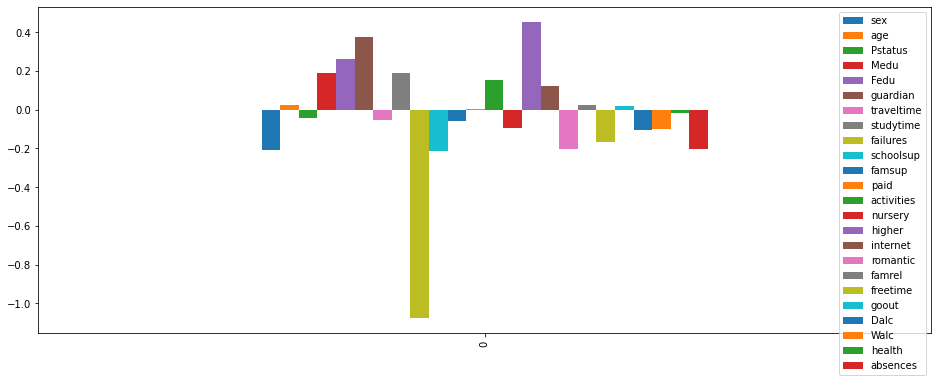

In [8]:
pd.DataFrame(lr.coef_, columns=df_x.columns).plot(kind='bar')

In [9]:
lr.predict_proba([df_t[142]]) 

array([[0.44469276, 0.55530724]])

In [10]:
coefs = pd.DataFrame(lr.coef_,columns=df_x.columns).T
coefs

,0
sex,-0.209240
age,0.022591
Pstatus,-0.041064
Medu,0.190403
Fedu,0.263213
guardian,0.375031
traveltime,-0.055438
studytime,0.189414
failures,-1.076179
schoolsup,-0.214572


# Naive Bayes

Aplica el clasificador Naive Bayes al conjunto de datos `customer segmentation` del directorio datos.

Debemos utilizar el codificador OrdinalEncoder sobre los datos para poder convertir los datos categóricos a numerales.



In [11]:
df = pd.read_csv('./Datos/customer segmentation.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
oe = OrdinalEncoder()

df.dropna(how='any', inplace=True)

X = df.drop(columns='Var_1')
y = df[['Var_1']]

X_t = oe.fit_transform(X)
y_t = oe.fit_transform(y)

cd = CategoricalNB()

cd.fit(X_t, y_t)
y_pred = cd.predict(X_t)

accuracy_score(y_t, y_pred)

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7404828226555246

<AxesSubplot:ylabel='Count'>

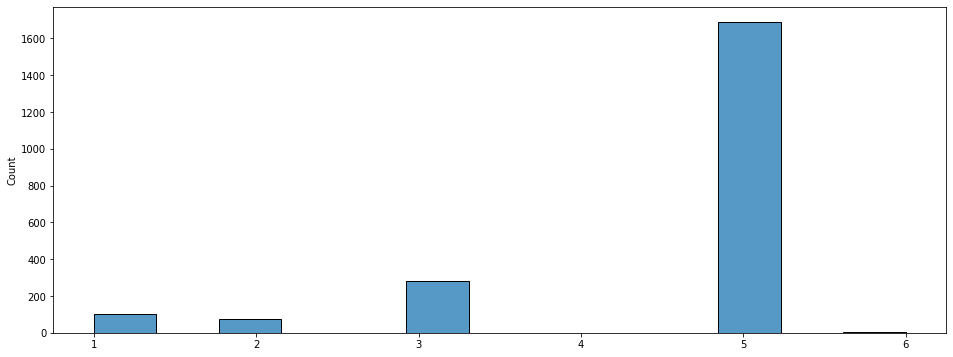

In [13]:
sns.histplot(y_pred)

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_t, y_t)
y_pred = gnb.predict(X_t)

accuracy_score(y_t, y_pred)

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6634168987929434

<AxesSubplot:ylabel='Count'>

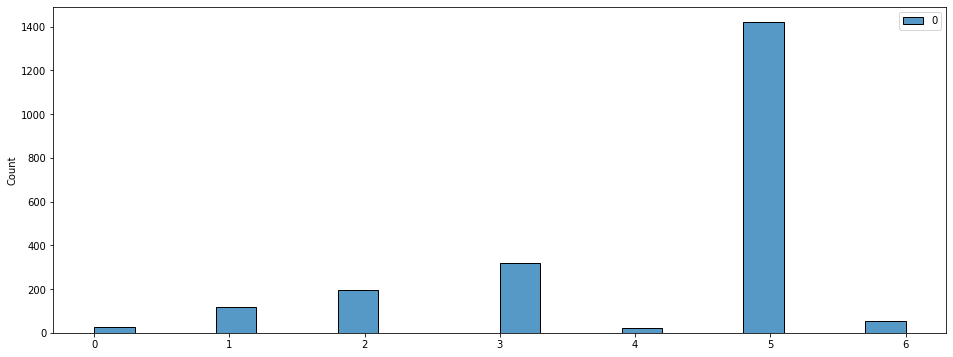

In [15]:
sns.histplot(y_t)

# Árbol de Decisión

Aplica un árbol de decisión sobre el conjunto de datos `customer segmentation`.

### ¿Cuántos niveles del árbol se generan por defecto?
### ¿Cuántos podemos eliminar sin perder más que un 5% de acierto?
### Dibuja el árbol resultante


In [16]:
df.dropna(how='any', inplace=True)
X = df.drop(columns='Var_1')
y = df[['Var_1']]

X_t = oe.fit_transform(X.values)
y_t = oe.fit_transform(y)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier()
dtc.fit(X_t, y_t)
y_pred = dtc.predict(X_t)
score1 = accuracy_score(y_t,y_pred)
score1

1.0

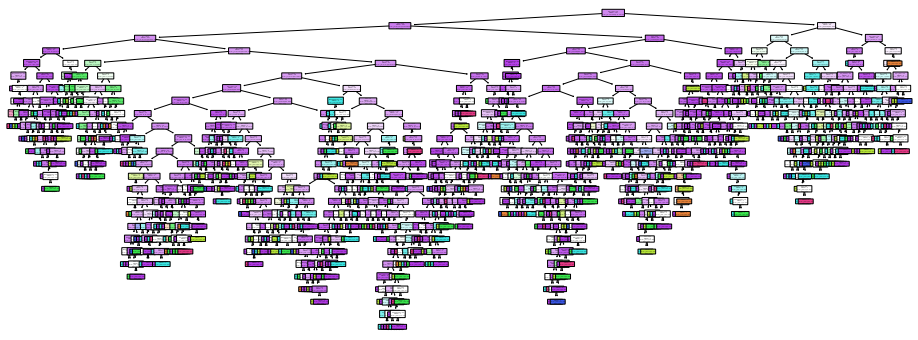

In [18]:
tree.plot_tree(dtc,feature_names = list(X.columns),class_names = np.unique(y),filled=True, rounded=True, impurity=False);

In [19]:
print('Niveles del Árbol: ',dtc.tree_.max_depth)

Niveles del Árbol:  25


In [20]:
r =0.05
k={}
for i in range(1,dtc.tree_.max_depth):
    dtc = DecisionTreeClassifier(max_depth=i)
    dtc.fit(X_t, y_t)
    y_pred = dtc.predict(X_t)
    if accuracy_score(y_t,y_pred)>=score1-0.05:
        k[i] = accuracy_score(y_t,y_pred)
    print('Num levels: {} - Score: {:.3f}'.format(i,accuracy_score(y_t,y_pred)))

Num levels: 1 - Score: 0.660
Num levels: 2 - Score: 0.669
Num levels: 3 - Score: 0.674
Num levels: 4 - Score: 0.689
Num levels: 5 - Score: 0.699
Num levels: 6 - Score: 0.713
Num levels: 7 - Score: 0.749
Num levels: 8 - Score: 0.772
Num levels: 9 - Score: 0.796
Num levels: 10 - Score: 0.826
Num levels: 11 - Score: 0.848
Num levels: 12 - Score: 0.875
Num levels: 13 - Score: 0.892
Num levels: 14 - Score: 0.911
Num levels: 15 - Score: 0.929
Num levels: 16 - Score: 0.945
Num levels: 17 - Score: 0.962
Num levels: 18 - Score: 0.974
Num levels: 19 - Score: 0.982
Num levels: 20 - Score: 0.991
Num levels: 21 - Score: 0.994
Num levels: 22 - Score: 0.996
Num levels: 23 - Score: 0.998
Num levels: 24 - Score: 0.999


In [21]:
print('Minimum level with a score loss < 0.05: ',min(k), '// Score loss: {:.3f}'.format(1-k[min(k)]))

Minimum level with a score loss < 0.05:  17 // Score loss: 0.038


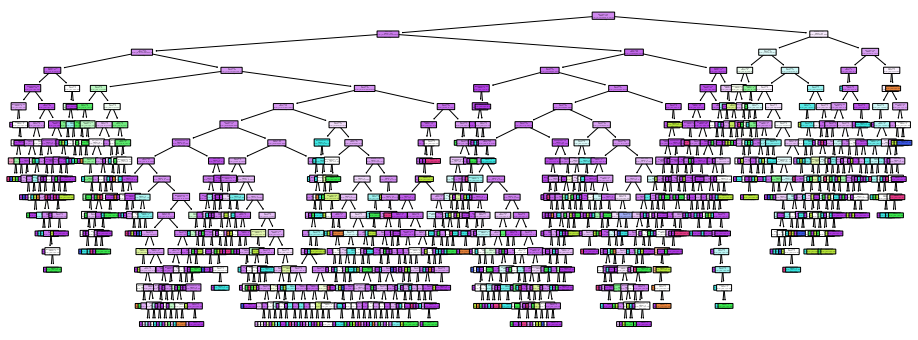

In [22]:
dtc = DecisionTreeClassifier(max_depth= min(k))
dtc.fit(X_t, y_t)
y_pred = dtc.predict(X_t)

tree.plot_tree(dtc,feature_names = list(X.columns),class_names = np.unique(y),filled=True, rounded=True, impurity=False);

# Random Forest

Aplica Random Forest sobre el conjunto de datos `customer segmentation`

### ¿Existe alguna mejoría entre utilizar 10 árboles o 100 árboles?
### Manteniendo el mismo nivel de profundidad que en el ejercicio anterior, ¿mejora nuestra puntuación?
### Dibuja los dos primeros árboles


In [23]:
len(y)

2154

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=False, max_depth=min(k))
rfc.fit(X_t, y_t)
y_pred = rfc.predict(X_t)
metrics.accuracy_score(y_t, y_pred)

C:\Users\aleex\AppData\Local\Temp/ipykernel_1852/2308324366.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_t, y_t)


0.999535747446611

In [25]:
print('Num de árboles: ',len(rfc.estimators_))

Num de árboles:  100


In [26]:
#tree.plot_tree(rfc.estimators_[0], feature_names=X.columns, class_names=np.unique(y), filled=True, rounded=True, impurity=True);

In [27]:
#tree.plot_tree(rfc.estimators_[1], feature_names=X.columns, class_names=np.unique(y), filled=True, rounded=True, impurity=True);

In [28]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(bootstrap=False, max_depth=min(k),n_estimators=10,min_impurity_decrease=.01, min_samples_leaf=3)
rfc.fit(X_t, y_t)
y_pred = rfc.predict(X_t)
metrics.accuracy_score(y_t, y_pred)

C:\Users\aleex\AppData\Local\Temp/ipykernel_1852/1311257662.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_t, y_t)


0.659702878365831

# SVM

Aplica el clasificador SVM sobre `customer segmentation`.

### Cuál es la precisión del modelo
### ¿Algún kernel mejora el modelo?
### ¿Algún valor de C o gamma mejora el modelo?
### El modelo termina con todos los valores de kernel-C,gamma que has probado?

No, tendremos que tener en cuenta también los bordes y contornos para evitar aporbar un modelo que, teniendo buen score, esté sobreentrenado y no generalice

In [29]:
kernels = ['rbf', 'poly',  'sigmoid']

In [30]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_t,y_t.ravel())
y_pred = svc.predict(X_t)

sc1 = accuracy_score(y_t,y_pred)

In [ ]:
for k in kernels:
    for C in [0.25, 0.5, 0.75, 1]:
        for gamma in ['auto', 'scale']:
            svc = SVC(kernel = k, C=C, gamma=gamma)
            svc.fit(X_t, y_t.ravel())
            y_pred = svc.predict(X_t)
            accuracy_score(y_t, y_pred)
            print(f'Kernel: {k}, C:{C}, gamma:{gamma}, acc: {accuracy_score(y_t,y_pred)}')

Kernel: rbf, C:0.25, gamma:auto, acc: 0.659702878365831
Kernel: rbf, C:0.25, gamma:scale, acc: 0.659702878365831
Kernel: rbf, C:0.5, gamma:auto, acc: 0.6610956360259982
Kernel: rbf, C:0.5, gamma:scale, acc: 0.659702878365831
Kernel: rbf, C:0.75, gamma:auto, acc: 0.6959145775301764
Kernel: rbf, C:0.75, gamma:scale, acc: 0.659702878365831
Kernel: rbf, C:1, gamma:auto, acc: 0.9846796657381616
Kernel: rbf, C:1, gamma:scale, acc: 0.659702878365831
Kernel: rbf, C:1.5, gamma:auto, acc: 0.9972144846796658
Kernel: rbf, C:1.5, gamma:scale, acc: 0.659702878365831
Kernel: rbf, C:2, gamma:auto, acc: 1.0
Kernel: rbf, C:2, gamma:scale, acc: 0.659702878365831
